In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
import plotly.express as px

In [2]:
data=pd.read_csv('advertising.csv')
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
#check if a null values exist
print(data.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
figure = px.scatter(data_frame= data, x="Sales", y="TV", trendline="ols")
figure.show()

In [8]:
figure = px.scatter(data_frame= data, x="Sales", y="Newspaper",size="Newspaper" , trendline="ols")
figure.show()

In [9]:
figure = px.scatter(data_frame= data, x="Sales", y="Radio", size="Radio", trendline="ols")
figure.show()

In [10]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [12]:
#Split the data
x= np.array(data.drop(["Sales"],axis= 1))
y = np.array(data["Sales"])

xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [13]:
#Model
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9059011844150826


In [15]:
#Our features are TV , Radio , Newspaper
features= np.array([[230.1,37.8, 69.2]])
print(model.predict(features))

[21.37254028]


In [21]:
# Calculate metrics
y_pred= model.predict(xtest)
mse = mean_squared_error(ytest, y_pred)
rmse = mse**0.5
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)


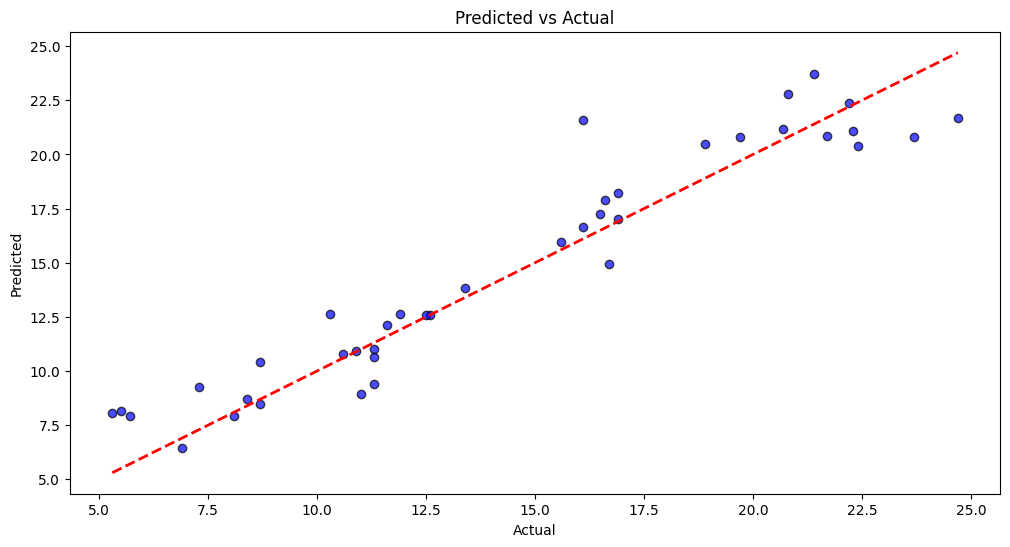

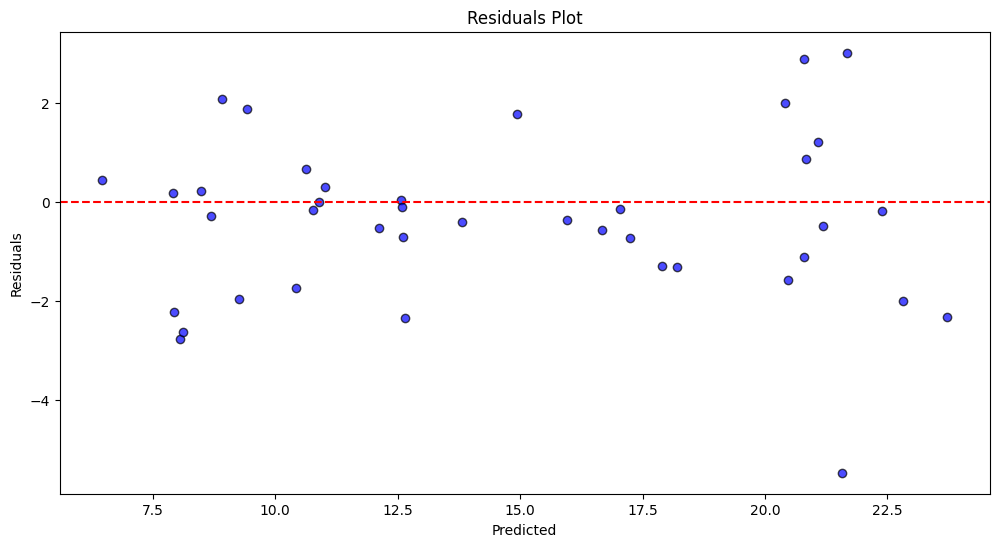

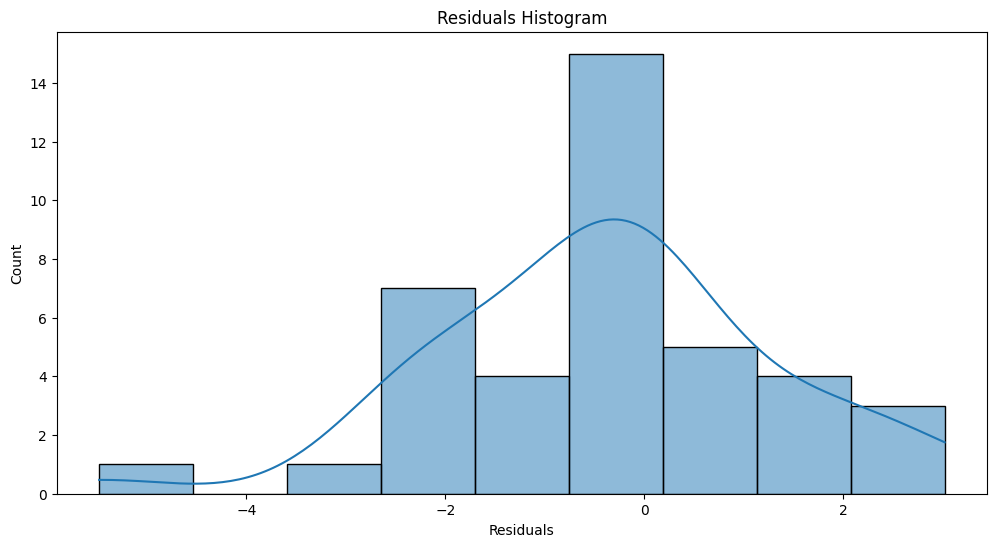

Mean Absolute Error: 1.2748262109549349
Mean Squared Error: 2.9077569102710923
Root Mean Squared Error: 1.7052146229349232
R-squared: 0.9059011844150826


In [24]:
# Plot Predicted vs Actual values
plt.figure(figsize=(12, 6))
plt.scatter(ytest, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

# Plot Residuals
residuals = ytest - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Plot Residuals Histogram
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram')
plt.show()

# Print Metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")